# Prediction using Decision Tree Algorithm

* Create the Decision Tree classifier and visualize it graphically.
* The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

## Author: Sachin Vinay

In [32]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import graphviz
import numpy as np
import pandas as pd
import seaborn as sns

In [33]:
iris=pd.read_csv('C:/Users/pin2v/Desktop/Iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [34]:
iris.Species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [35]:
iris['Species_class']=np.where(iris.Species=='Iris-virginica',1,np.where(iris.Species=='Iris-versicolor',2,3))

In [36]:
iris.Species_class.value_counts()

3    50
2    50
1    50
Name: Species_class, dtype: int64

In [37]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'Species_class'],
      dtype='object')

In [38]:
cols=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

#### Model Preparation

In [39]:
from sklearn.model_selection import train_test_split


train_X, test_X, train_y, test_y = train_test_split( iris[cols],
                                                  iris['Species_class'],
                                                  test_size = 0.2,
                                                  random_state = 123 )

#### Model Building

In [40]:
param_grid = {'max_depth': np.arange(2, 8),
             'max_features': np.arange(2,5)}

In [41]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
treea = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 10,verbose=1,n_jobs=-1)
treea.fit( train_X, train_y )

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.1s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7]),
                         'max_features': array([2, 3, 4])},
             verbose=1)

In [42]:
treea.best_score_

0.9583333333333333

In [43]:
treea.best_estimator_

DecisionTreeClassifier(max_depth=4, max_features=3)

In [44]:
treea.best_params_

{'max_depth': 4, 'max_features': 3}

In [45]:
train_pred = treea.predict(train_X)

In [46]:
test_pred = treea.predict(test_X)

In [47]:
import sklearn.metrics as metrics
print(metrics.classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           1       1.00      0.91      0.95        11
           2       0.86      1.00      0.92         6
           3       1.00      1.00      1.00        13

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



#### Building Final Decision Tree

In [48]:
clf_tree = DecisionTreeClassifier( max_depth = 4, max_features=2)
clf_tree.fit( train_X, train_y )

DecisionTreeClassifier(max_depth=4, max_features=2)

In [49]:
tree_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': clf_tree.predict( test_X ) } )

In [50]:
tree_test_pred.sample( n = 10 )

,actual,predicted
45,3,3
112,1,1
28,3,3
46,3,3
63,2,2
141,1,1
117,1,1
33,3,3
132,1,1
127,1,1


In [51]:
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.9333333333333333

Text(0.5, 15.0, 'Predicted label')

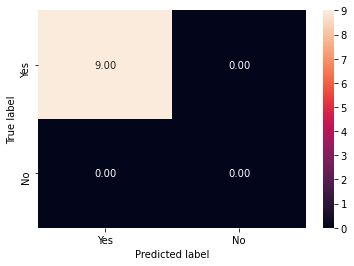

In [52]:
tree_cm = metrics.confusion_matrix( tree_test_pred.predicted,
                                 tree_test_pred.actual,
                                 [1,0] )
sns.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

#### Graphical Representation of Decision Tree

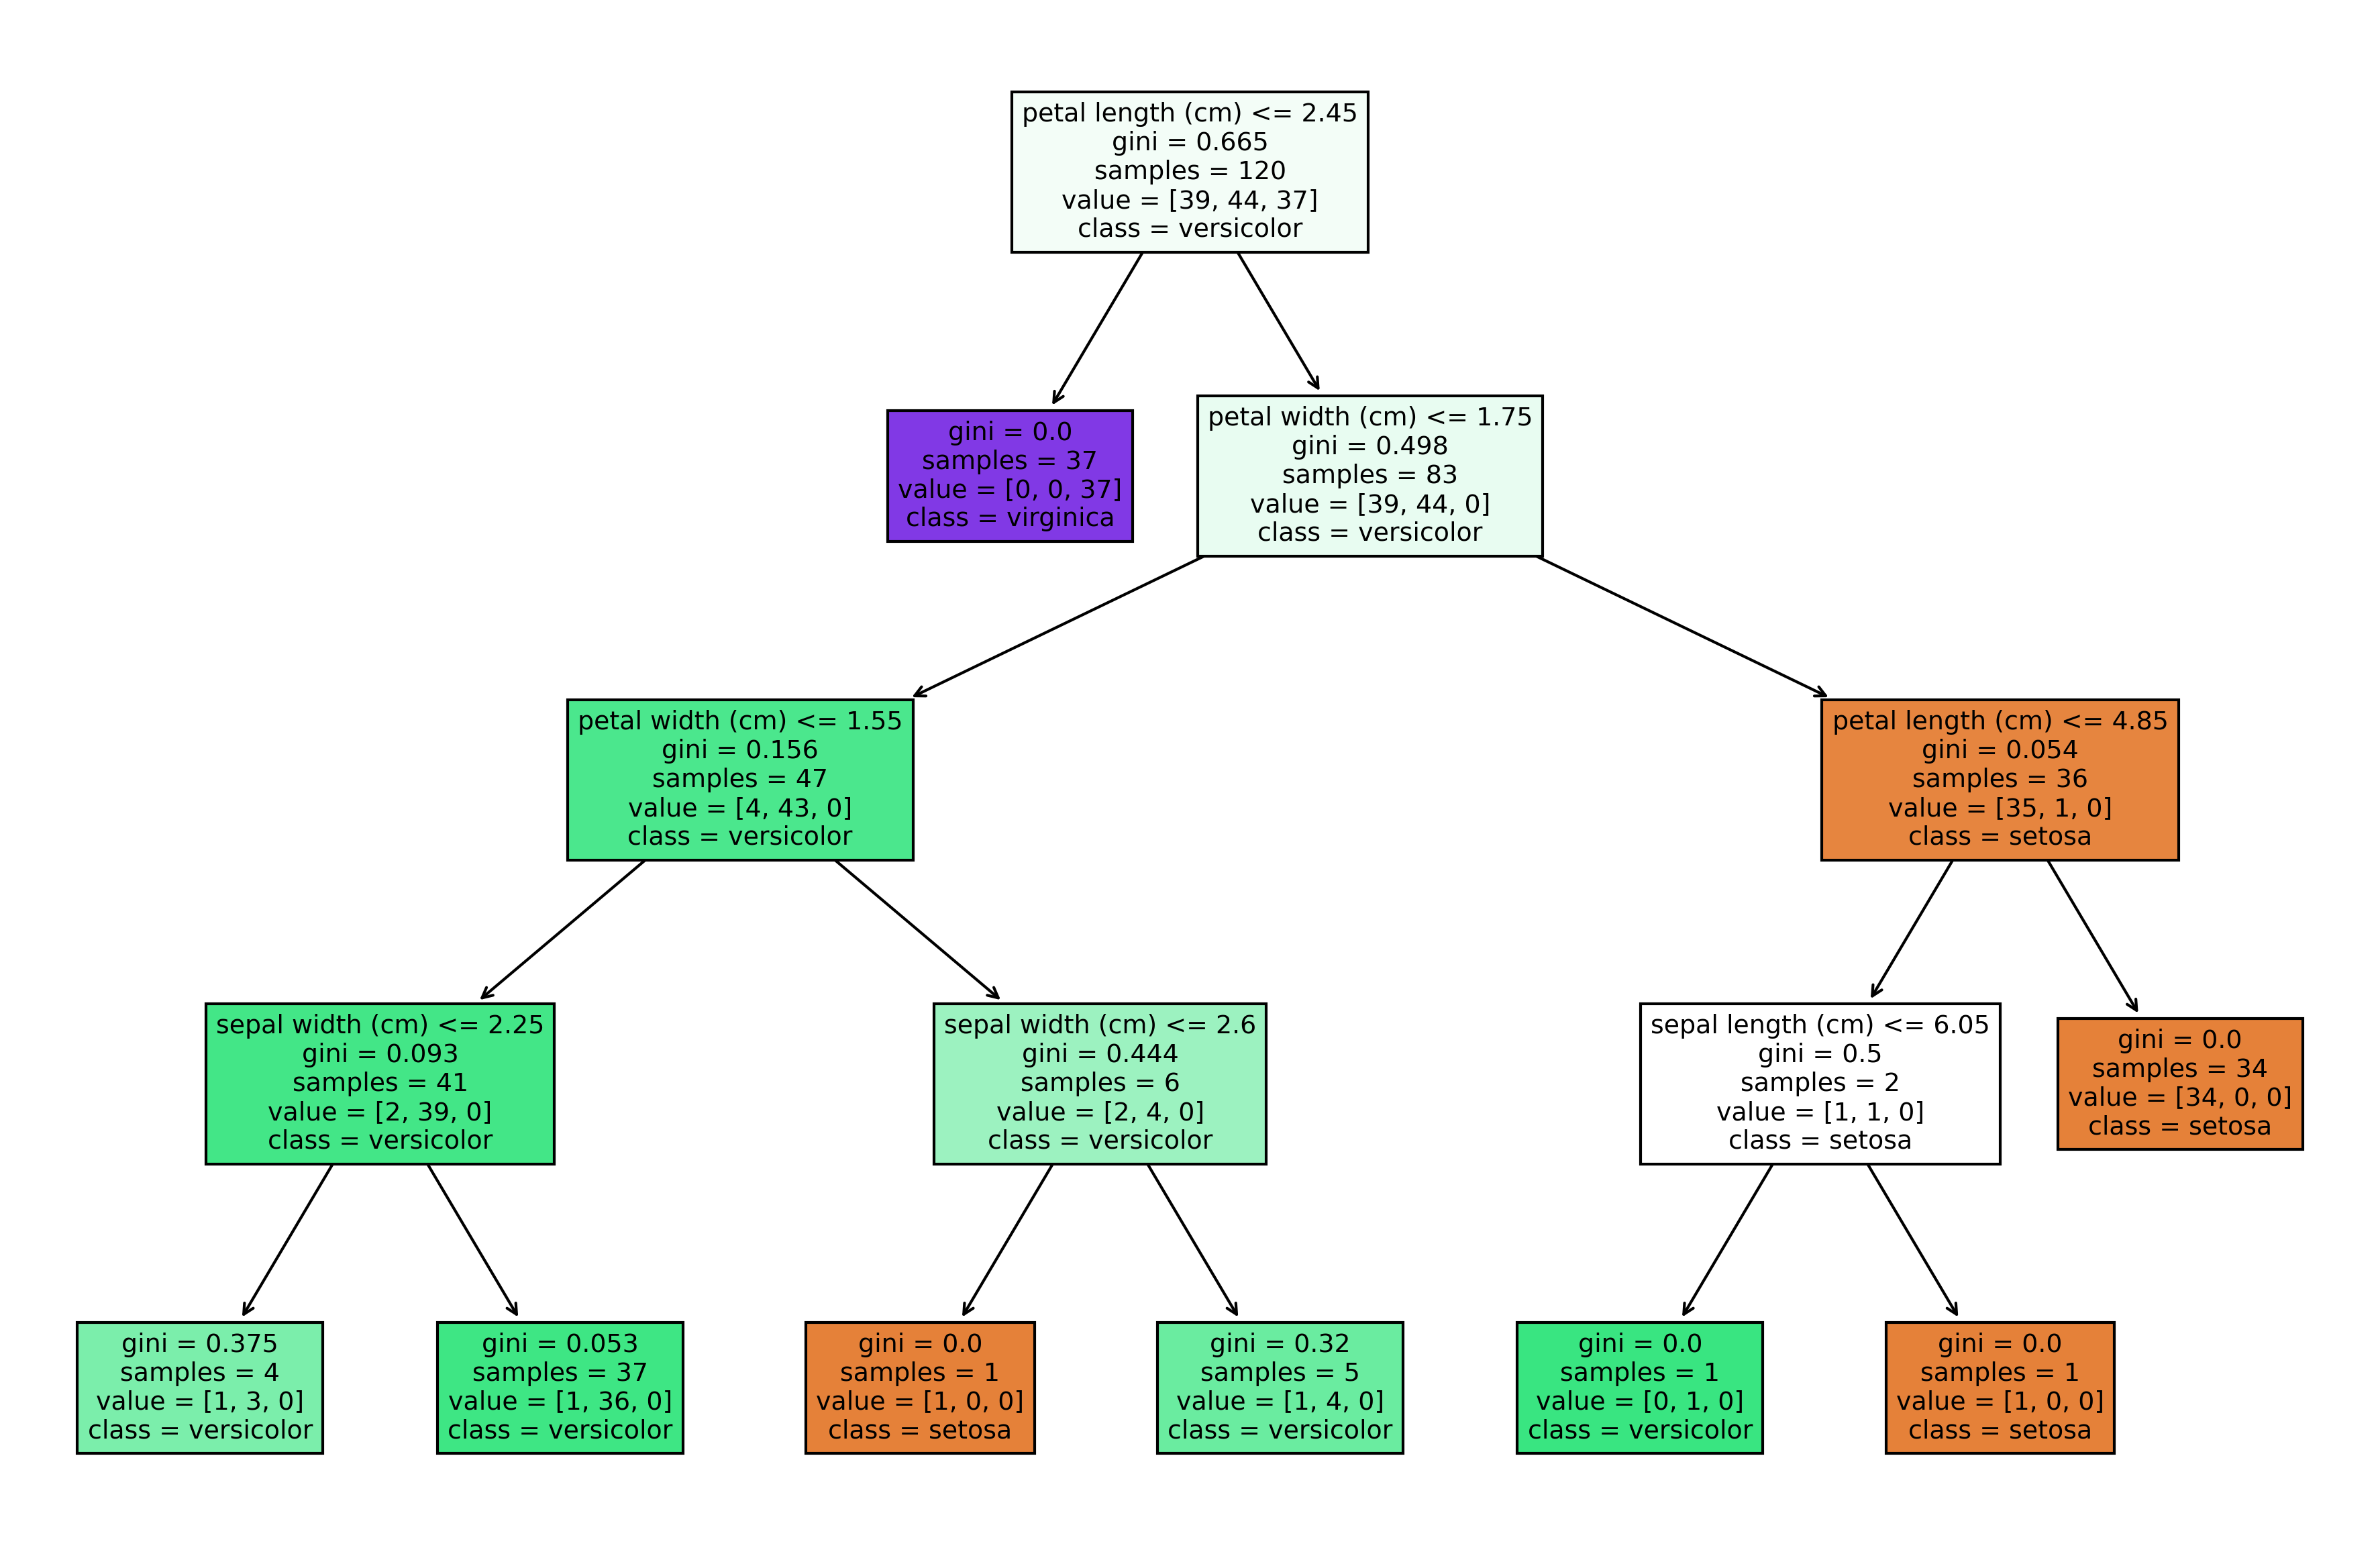

In [53]:
from sklearn import tree
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,10), dpi=300)
tree.plot_tree(clf_tree,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

In [54]:
fig.savefig("decistion_tree.png")

In [55]:
import graphviz

In [56]:
X= train_X
y=train_y
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)

In [57]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 3
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 5.35
|   |   |   |--- feature_0 <= 4.95
|   |   |   |   |--- feature_3 <= 1.35
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_3 >  1.35
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  4.95
|   |   |   |   |--- feature_2 <= 4.95
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_2 >  4.95
|   |   |   |   |   |--- feature_3 <= 1.55
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_3 >  1.55
|   |   |   |   |   |   |--- class: 2
|   |   |--- feature_2 >  5.35
|   |   |   |--- class: 1
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.00
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  3.00
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 1



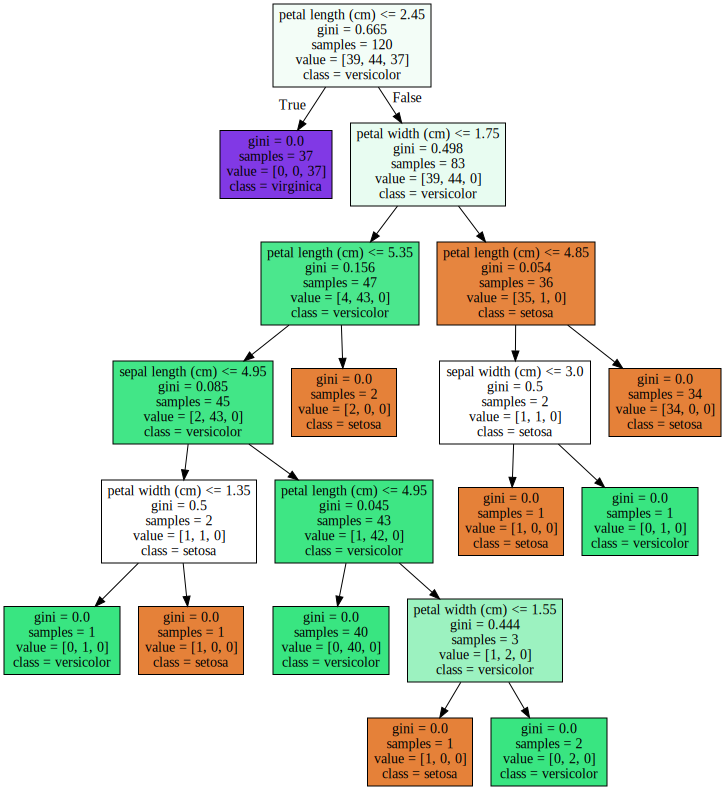

In [58]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=fn,  
                                class_names=cn,
                                filled=True)
# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

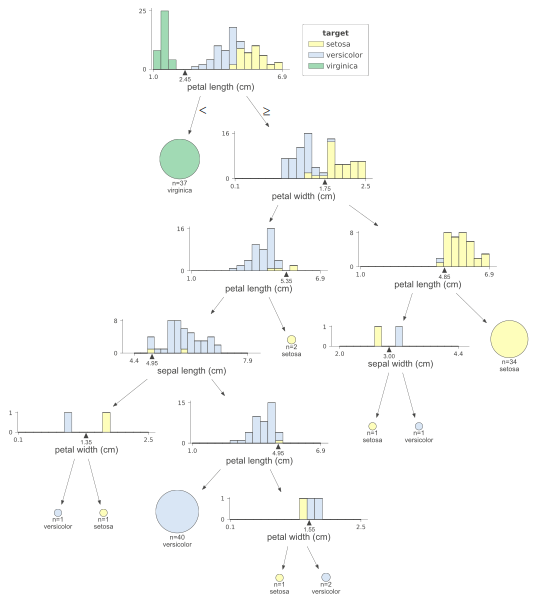

In [59]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(clf, X, y,
                target_name="target",
               feature_names = fn, 
               class_names=list(cn))

viz

In [60]:
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [61]:
# Fit the regressor, set max_depth = 3
regr = DecisionTreeRegressor(max_depth=3, random_state=1234)
model = regr.fit(X, y)
text_representation = tree.export_text(regr)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- value: [3.00]
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 5.35
|   |   |   |--- value: [1.96]
|   |   |--- feature_2 >  5.35
|   |   |   |--- value: [1.00]
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- value: [1.50]
|   |   |--- feature_2 >  4.85
|   |   |   |--- value: [1.00]



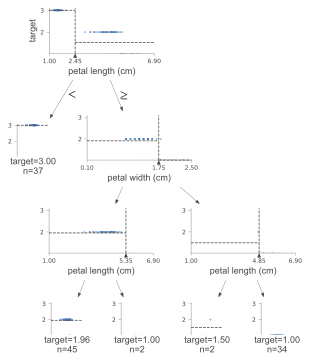

In [62]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(regr, X, y,
                target_name="target",
                 feature_names = fn)
viz